In [135]:
#import library
import numpy as np
import pandas as pd

In [136]:
#membaca file .csv
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [137]:
#melihat tipe data yang ada pada masing-masing fitur dan kelas
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [138]:
#melihat jumlah kolom dan baris pada tabel data
data.shape

(5110, 12)

In [139]:
#mendeskripsikan data mulai dari mean, std, min-max etc.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


C:\Users\lenovo\.conda\envs\Data1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


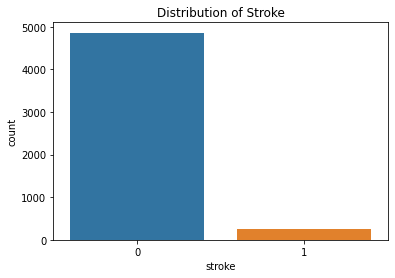

In [140]:
#memxisualisasikan sebaran data jumlah populasi dari fitur terhadap kelas
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data['stroke']).set_title('Distribution of Stroke')
plt.show()

In [141]:
#melihat banyaknya data yang kosong
df = data.isnull().sum().sort_values(ascending = False)
print(df)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64


In [142]:
#memisahkan kelas
df1=data.loc[data['stroke']==0]
df2=data.loc[data['stroke']==1]

In [143]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [144]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [145]:
#tahap preprocessing
#memberikan input mean bagi data bmi yang kosong/NaN
df1['bmi'].fillna(df1['bmi'].mean(),inplace=True)
df2['bmi'].fillna(df1['bmi'].mean(),inplace=True)
data1=df1.append(df2)
data1.head()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_8924/2706885546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bmi'].fillna(df1['bmi'].mean(),inplace=True)
C:\Users\lenovo\AppData\Local\Temp/ipykernel_8924/2706885546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bmi'].fillna(df1['bmi'].mean(),inplace=True)
C:\Users\lenovo\AppData\Local\Temp/ipykernel_8924/2706885546.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1=df1.append(df2)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [146]:
#data telah bersih
df = data1.isnull().sum().sort_values(ascending = False)
print(df)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [147]:
data1.shape

(5110, 12)

<AxesSubplot:xlabel='smoking_status', ylabel='hypertension'>

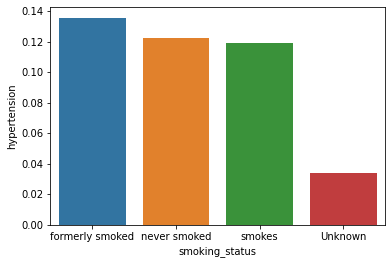

In [148]:
#clasifikasi dengan bar plot
sns.barplot(x="smoking_status", y="hypertension", data=data, ci=None)

<AxesSubplot:xlabel='smoking_status', ylabel='heart_disease'>

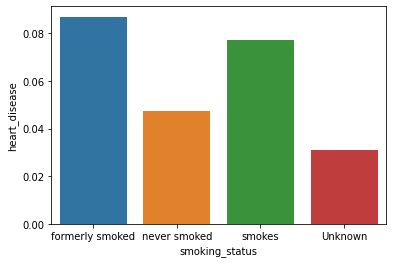

In [149]:
sns.barplot(x="smoking_status", y="heart_disease", data=data, ci=None)

<AxesSubplot:xlabel='gender', ylabel='hypertension'>

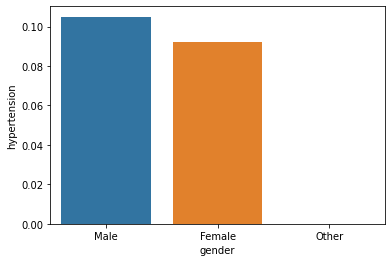

In [150]:
sns.barplot(x="gender", y="hypertension", data=data, ci=None)

<AxesSubplot:xlabel='gender', ylabel='heart_disease'>

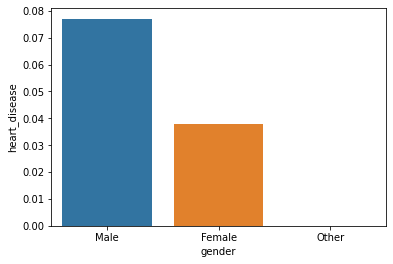

In [151]:
sns.barplot(x="gender", y="heart_disease", data=data, ci=None)

<AxesSubplot:xlabel='gender', ylabel='stroke'>

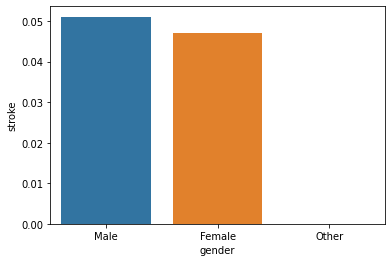

In [152]:
sns.barplot(x="gender", y="stroke", data=data, ci=None)

In [153]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data1["gender"])
data1["gender"]=le.transform(data1["gender"])
gender_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(gender_labels)

{'Female': 0, 'Male': 1, 'Other': 2}


In [154]:
le.fit(data1["ever_married"])
data1["ever_married"] = le.transform(data1["ever_married"])
ever_married_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(ever_married_labels)

{'No': 0, 'Yes': 1}


In [155]:
le.fit(data1["work_type"])
data1["work_type"] = le.transform(data1["work_type"])
work_type_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(work_type_labels)

{'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}


In [156]:
le.fit(data1["Residence_type"])
data1["Residence_type"] = le.transform(data1["Residence_type"])
residence_type_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(residence_type_labels)

{'Rural': 0, 'Urban': 1}


In [157]:
le.fit(data1["smoking_status"])
data1["smoking_status"] = le.transform(data1["smoking_status"])
smoking_status_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(smoking_status_labels)

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [158]:
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,1,3.0,0,0,0,4,0,95.12,18.0,0,0
250,30468,1,58.0,1,0,1,2,1,87.96,39.2,2,0
251,16523,0,8.0,0,0,0,2,1,110.89,17.6,0,0
252,56543,0,70.0,0,0,1,2,0,69.04,35.9,1,0
253,46136,1,14.0,0,0,0,1,0,161.28,19.1,0,0


In [159]:
data1.shape

(5110, 12)

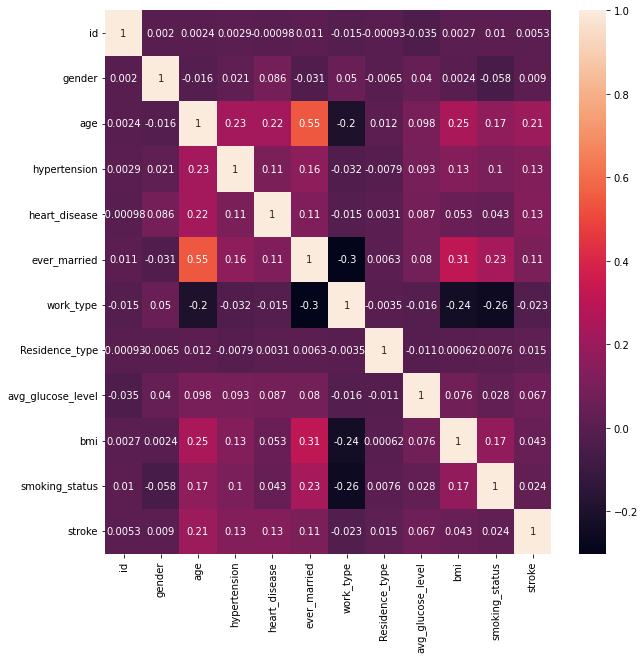

In [160]:
#melihat ketergantungan suatu fitur terhadap kelas
#dengan menggunakan heatmap
plt.figure(figsize=(10,10))
cor = data1.corr(method="kendall")
sns.heatmap(cor, annot=True)
plt.show()

In [161]:
#karena hanya 'age', 'hypertesion' dan 'heart disease' yang berpengaruh pada 'stroke' maka variabel selain itu akan saya drop
data1.drop(columns=["id", "gender", "work_type","Residence_type", "smoking_status", "avg_glucose_level", "bmi"], inplace=True)
data1.dropna(inplace=True)
data1.head()

,age,hypertension,heart_disease,ever_married,stroke
249,3.0,0,0,0,0
250,58.0,1,0,1,0
251,8.0,0,0,0,0
252,70.0,0,0,1,0
253,14.0,0,0,0,0


In [163]:
#melakukan pemisahan kelas dan fitur untuk proses klasifikasi
import sweetviz as sv
x = data1.drop('stroke',axis=1)
y = data1.stroke

In [164]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7)
print(x_train.shape, x_test.shape)

(3577, 4) (1533, 4)


In [167]:
data1_train = pd.DataFrame(x_train, columns=x.columns).reset_index(drop=True)
data1_train['stroke'] = y_train.values
data1_train['stroke'] = data1_train['stroke'].astype('float')

data1_test = pd.DataFrame(x_test, columns=x.columns).reset_index(drop=True)
data1_test['stroke'] = y_test.values
data1_test['stroke'] = data1_test['stroke'].astype('float')

[Step 3/3] Generating associations graph     |          | [  0%]   00:00 -> (? left)    C:\Users\lenovo\.conda\envs\Data1\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\lenovo\.conda\envs\Data1\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\lenovo\.conda\envs\Data1\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\


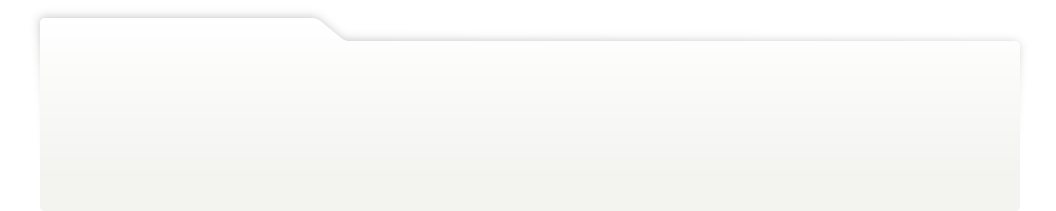
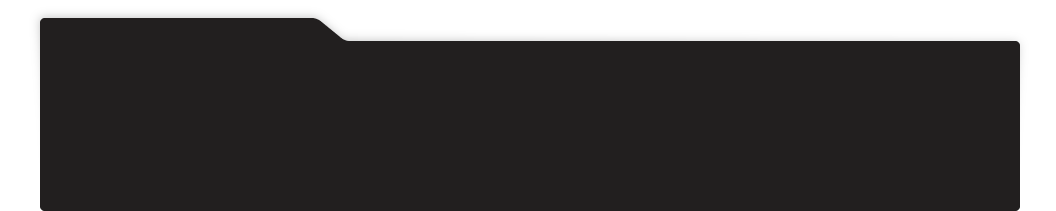
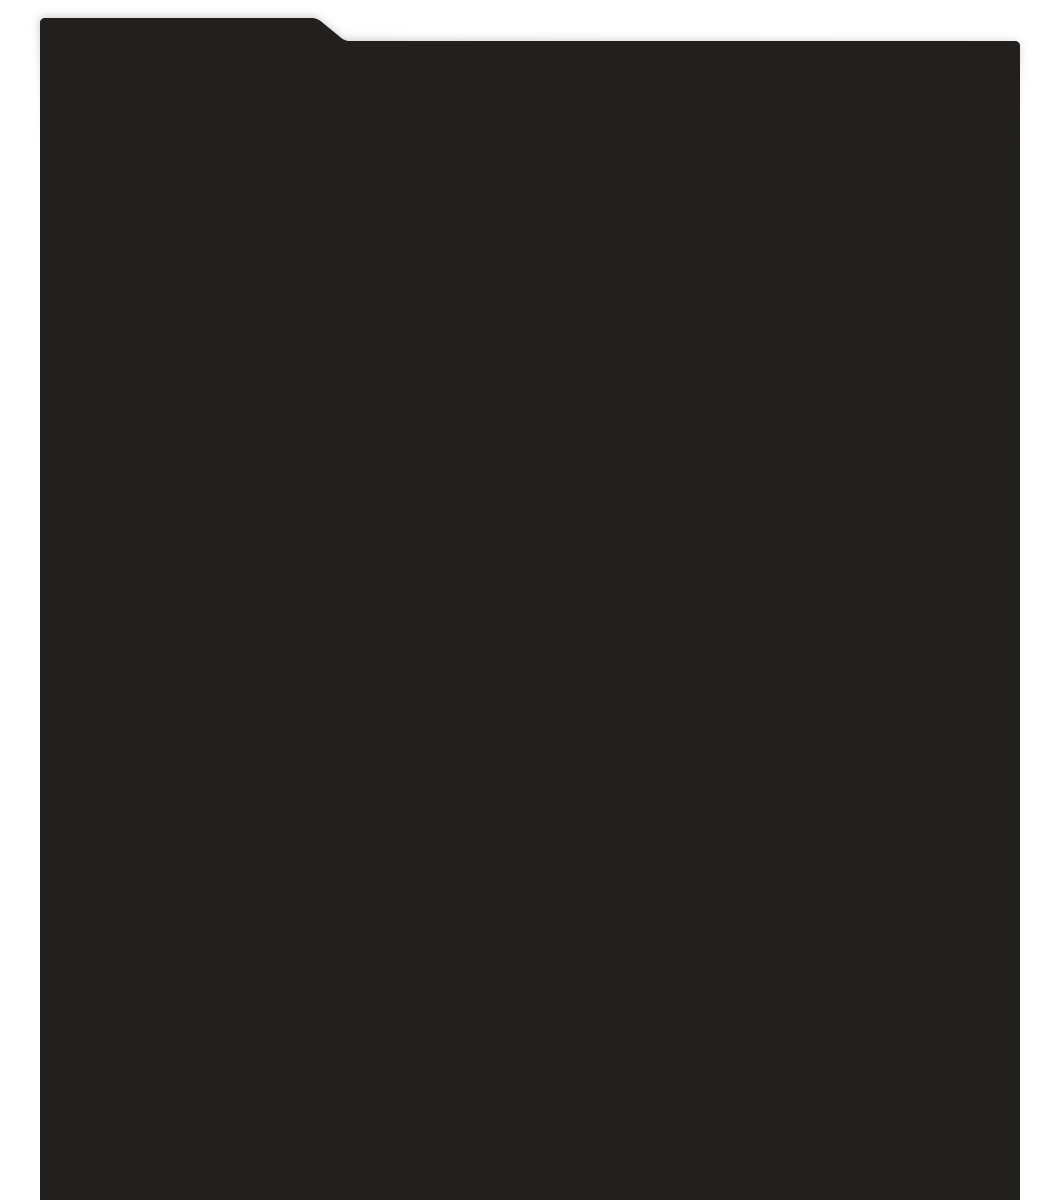
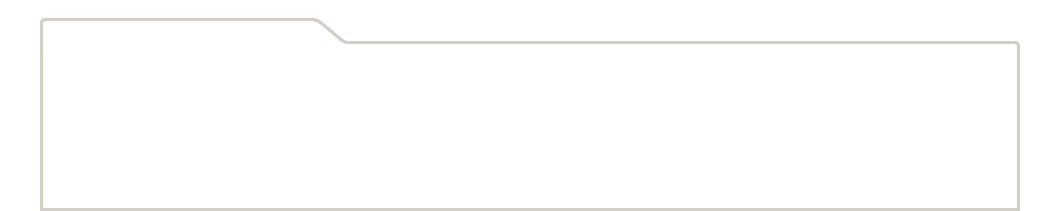
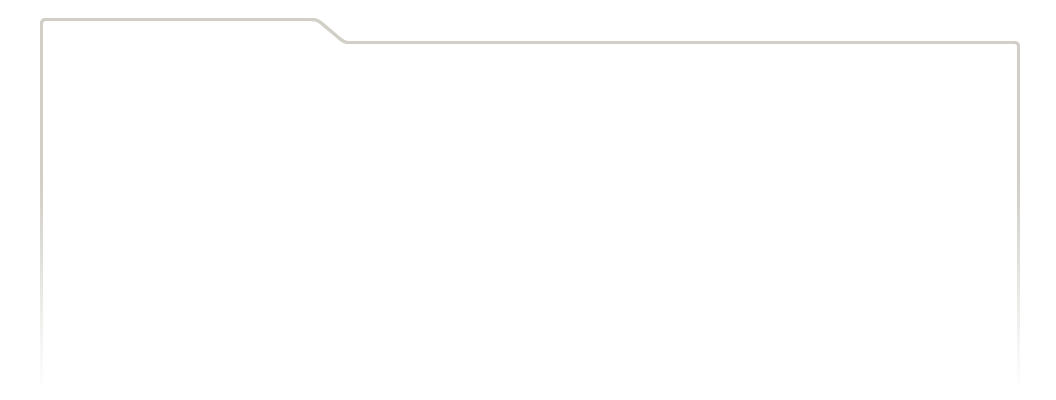
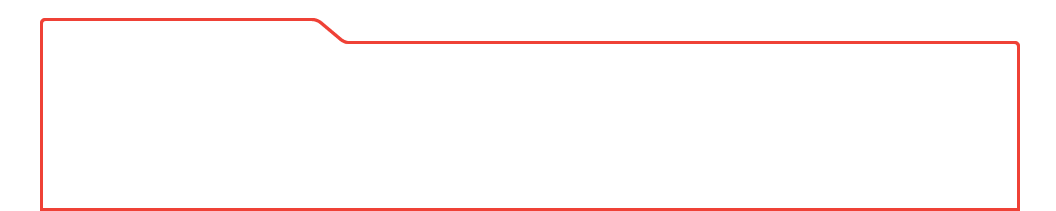
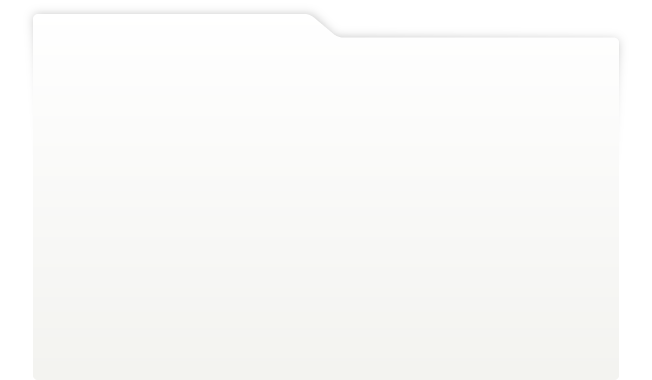
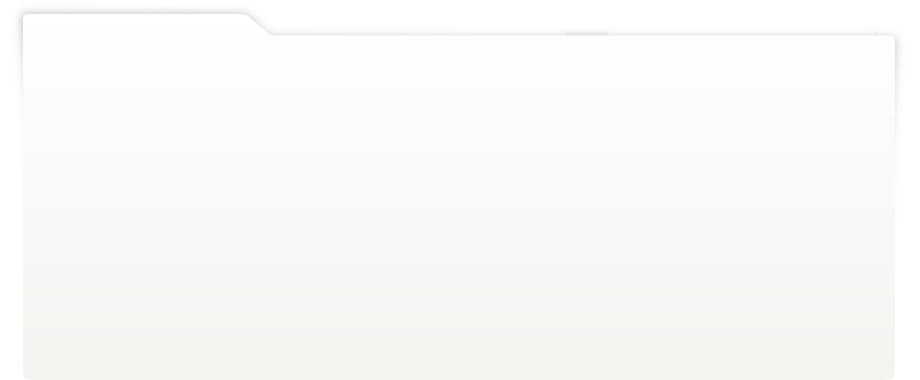
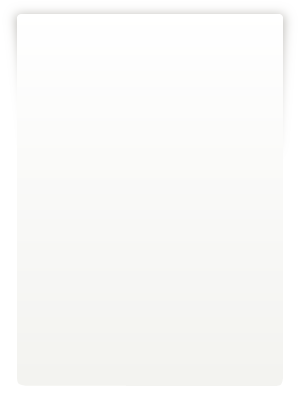
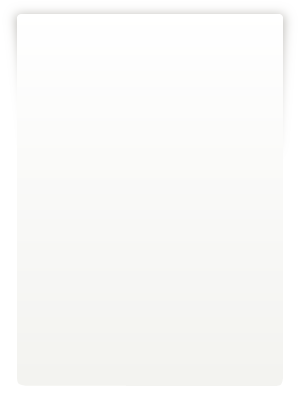
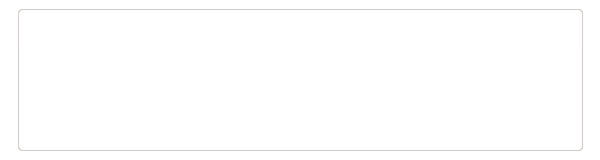
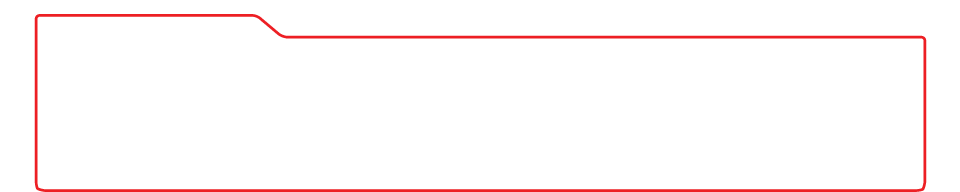
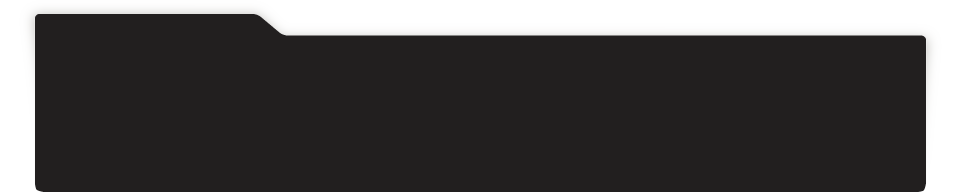
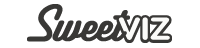
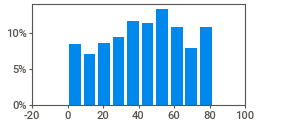
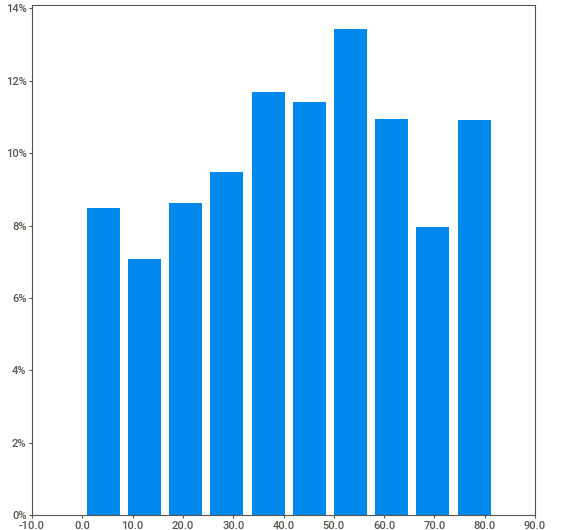
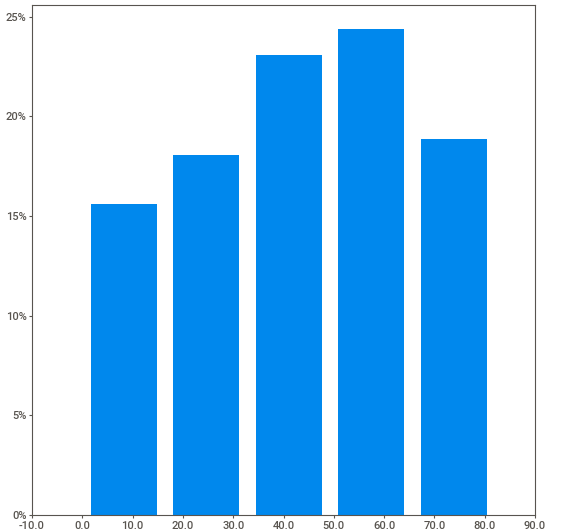
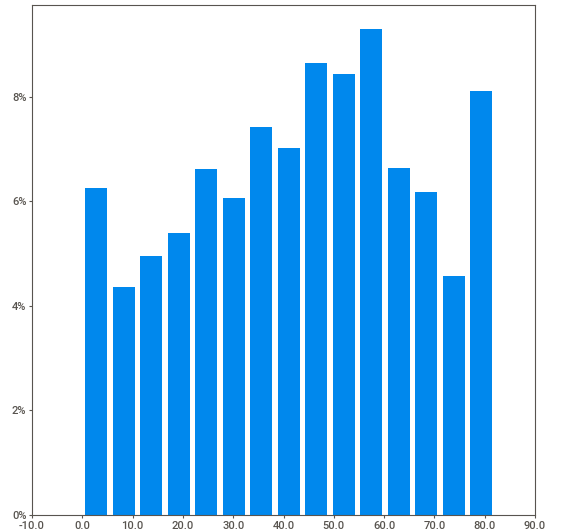
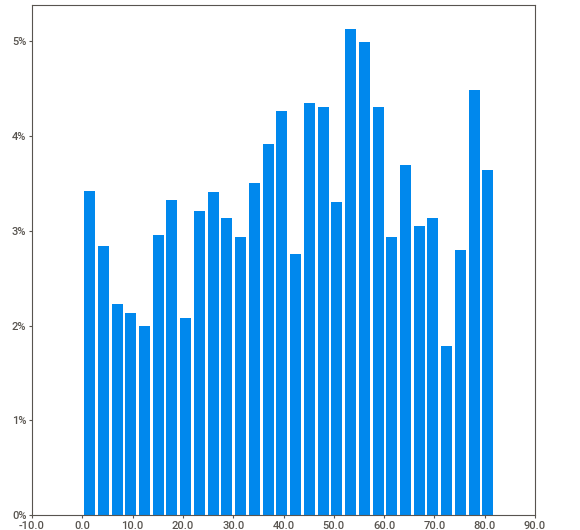
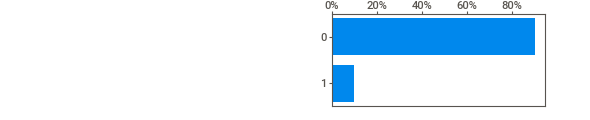
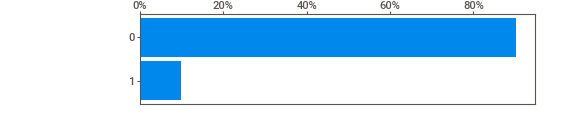
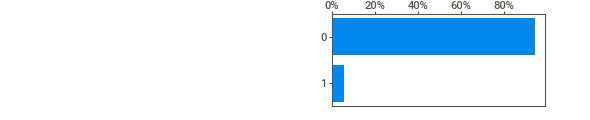
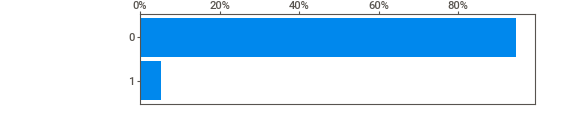
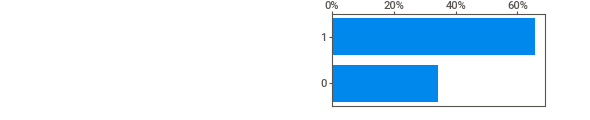
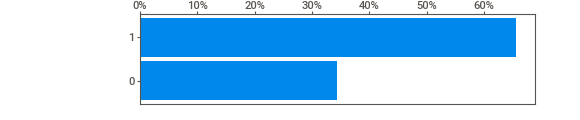
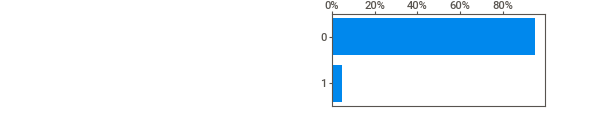
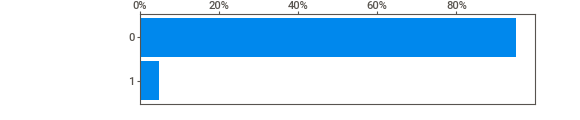
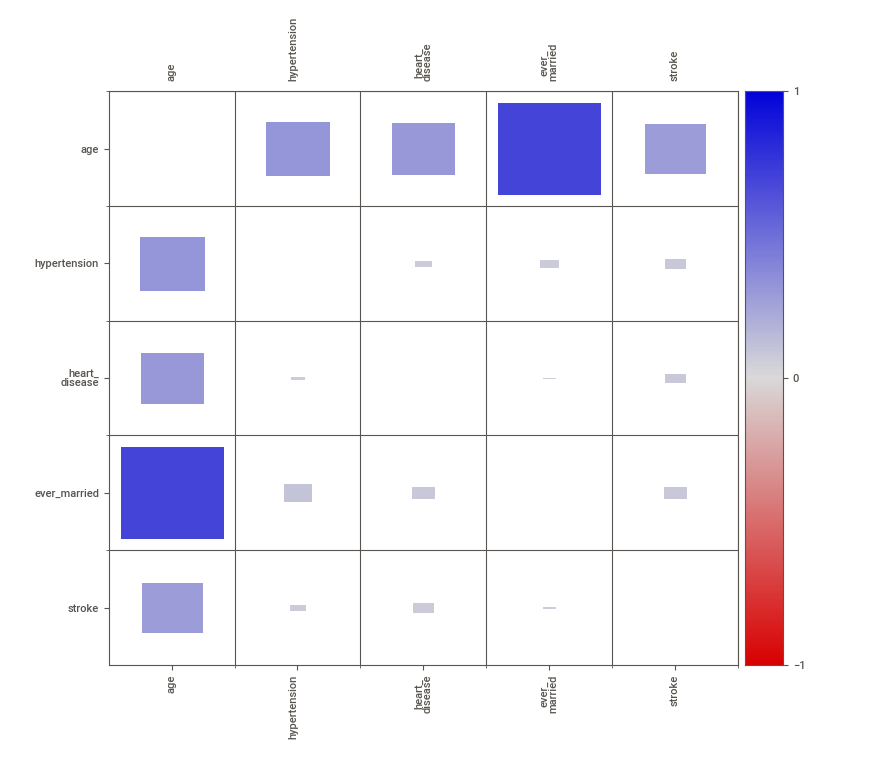
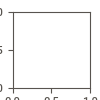

In [168]:
report = sv.analyze(data1)
# report.show_html(pth+"report.html")
report.show_notebook()

[Step 3/3] Generating associations graph     |          | [  0%]   00:00 -> (? left)    C:\Users\lenovo\.conda\envs\Data1\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\lenovo\.conda\envs\Data1\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\lenovo\.conda\envs\Data1\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\


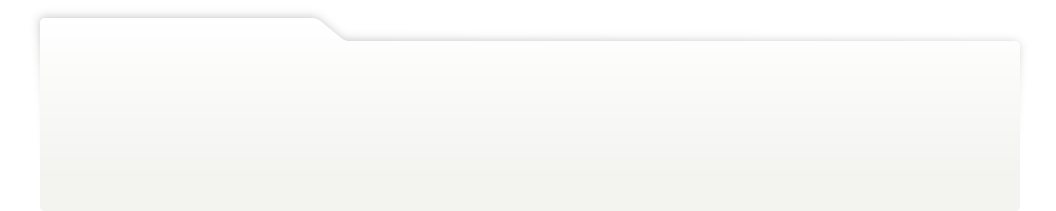
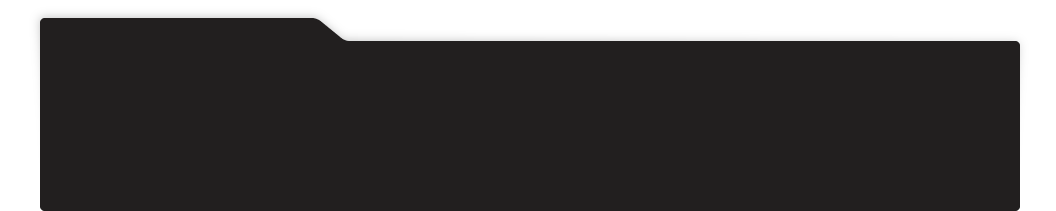
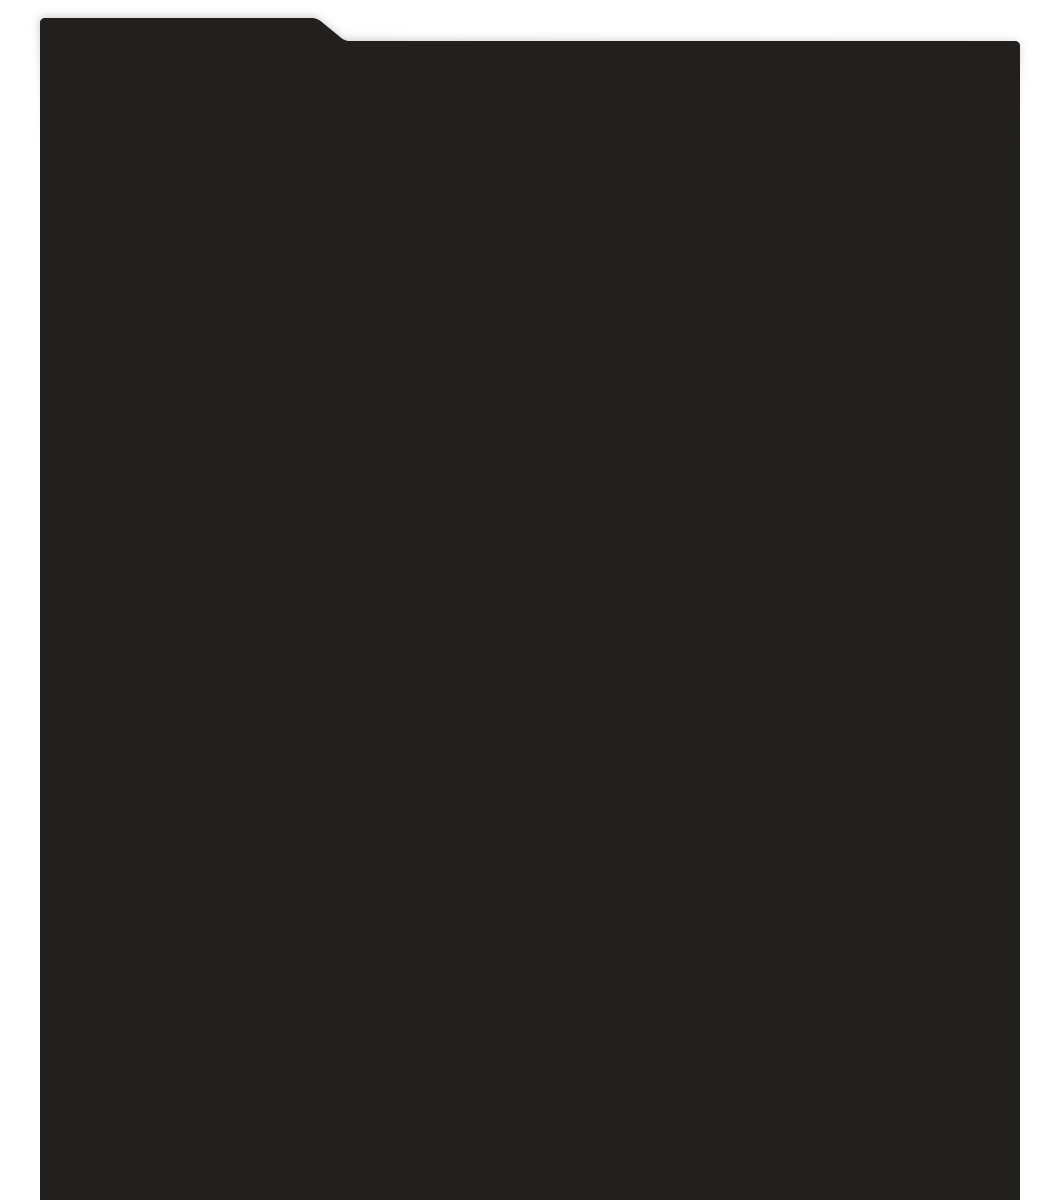
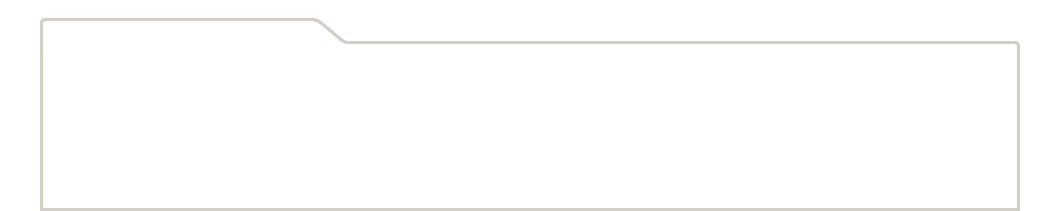
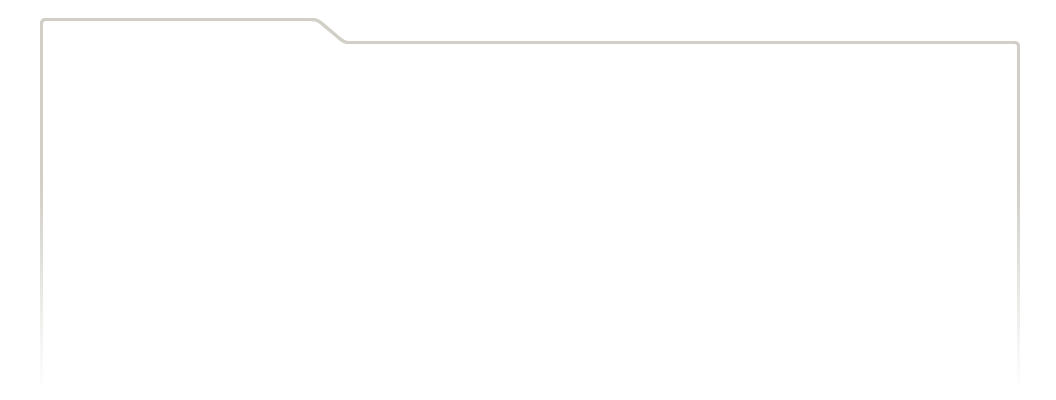
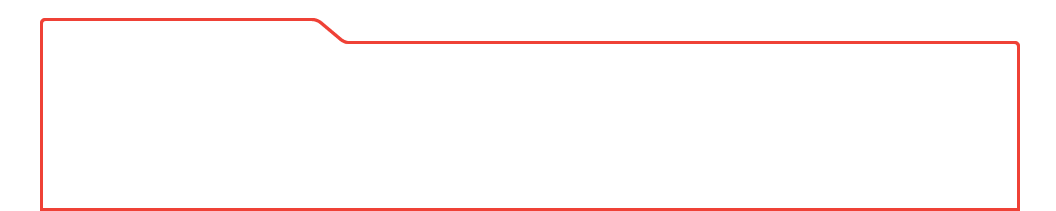
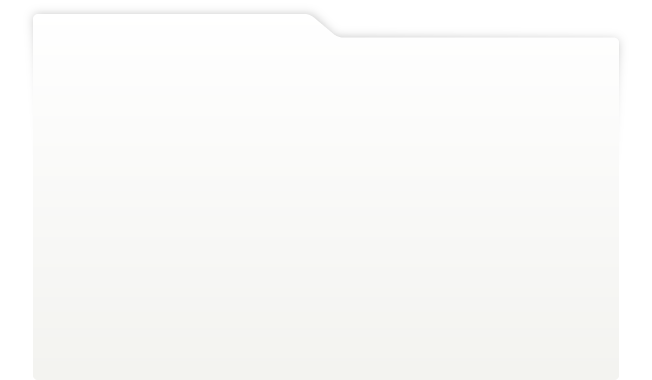
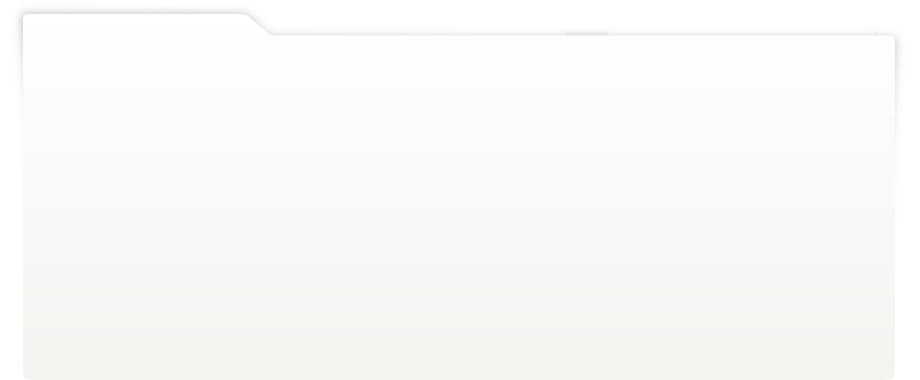
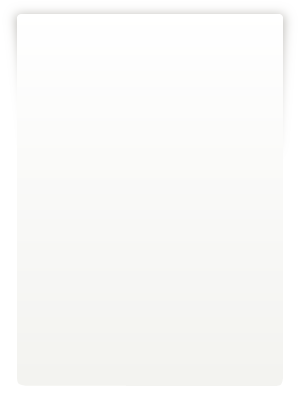
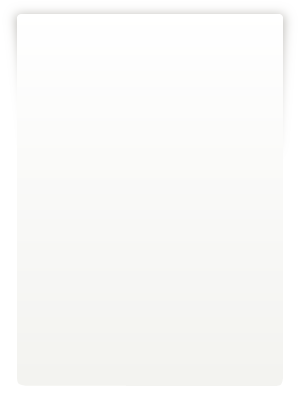
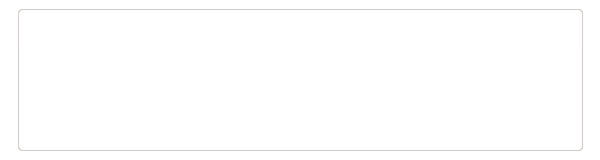
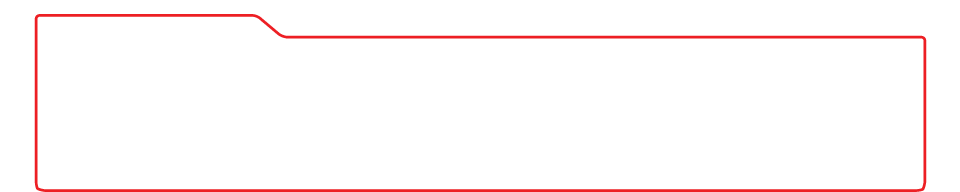
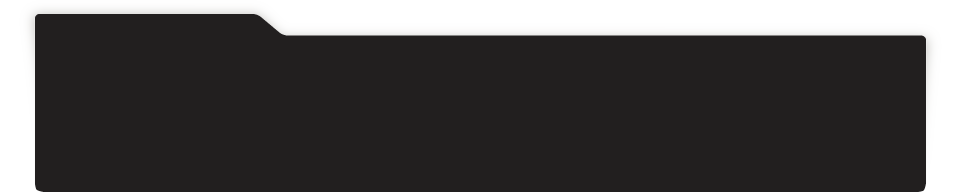
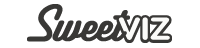
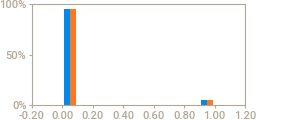
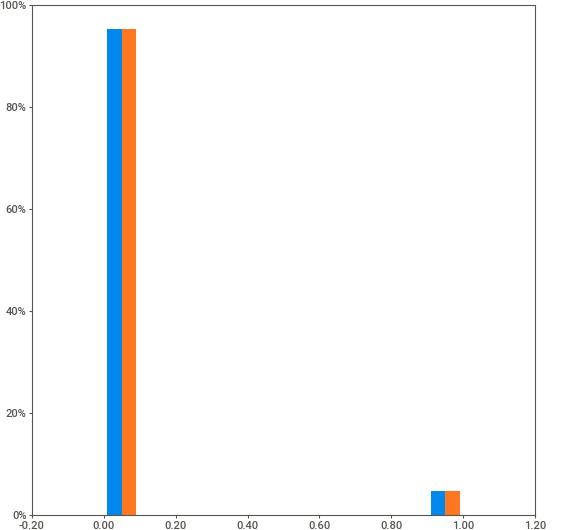
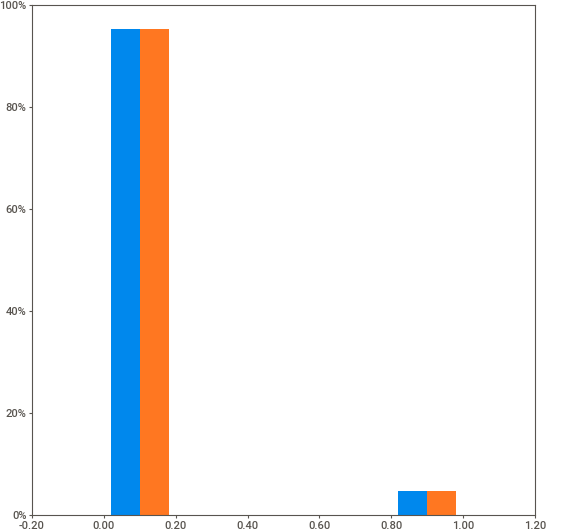
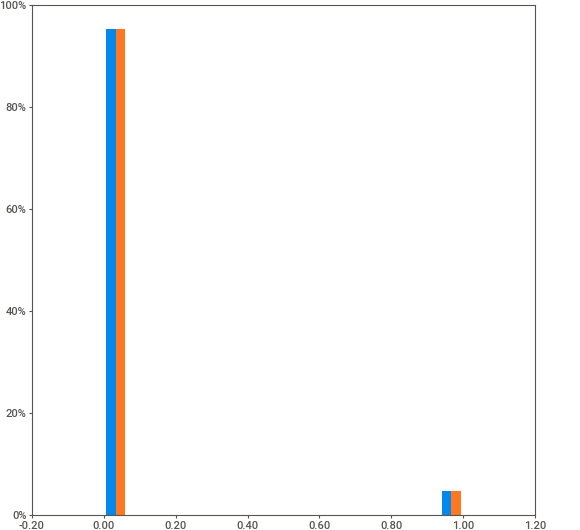
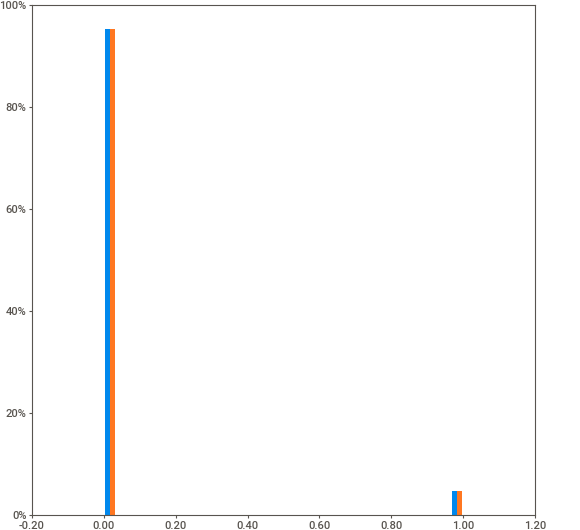
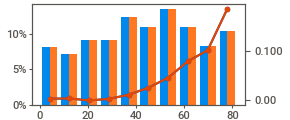
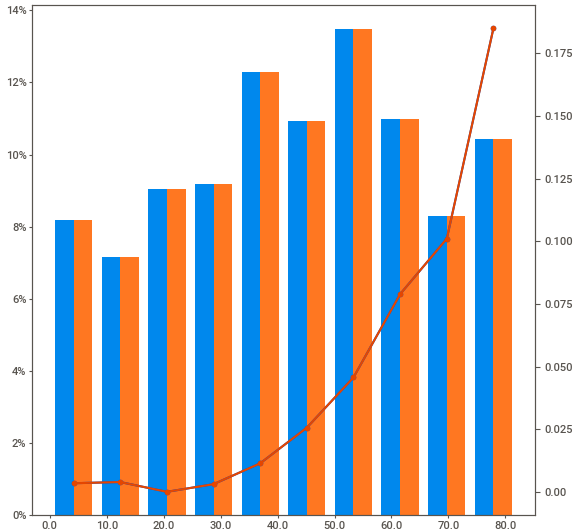
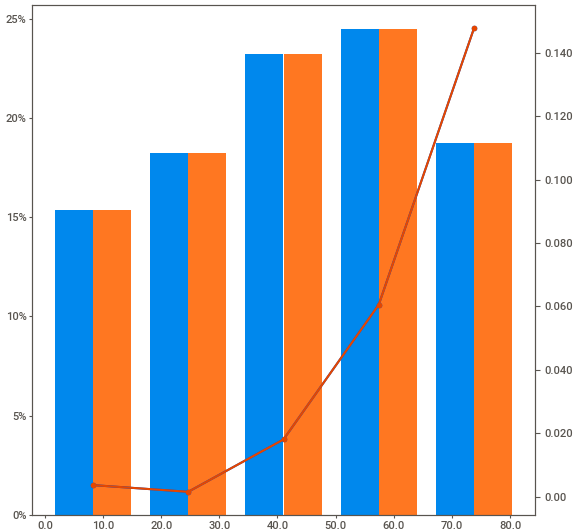
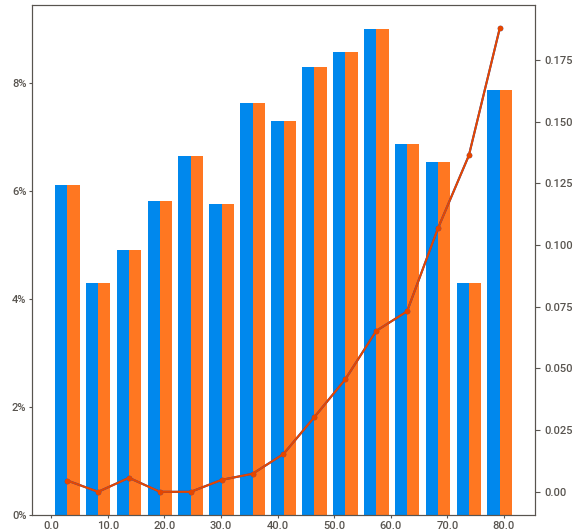
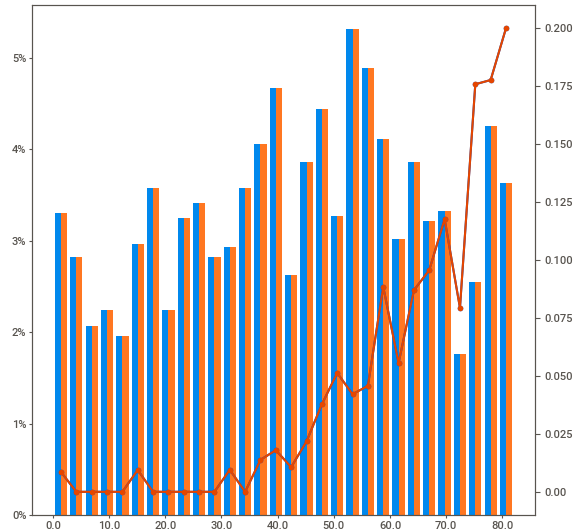
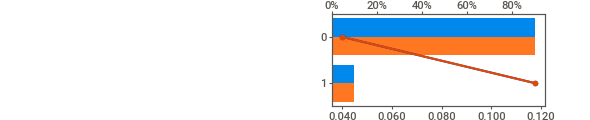
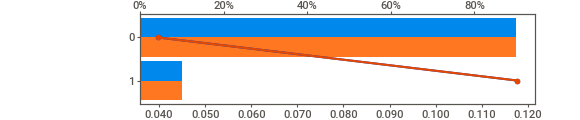
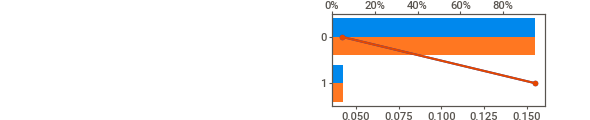
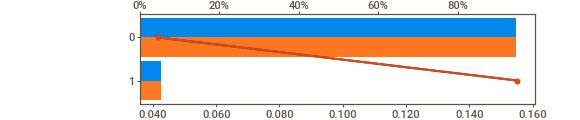
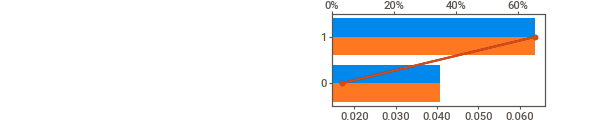
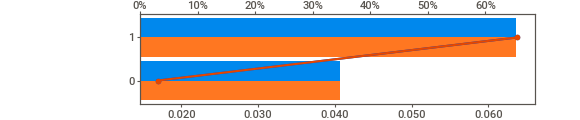
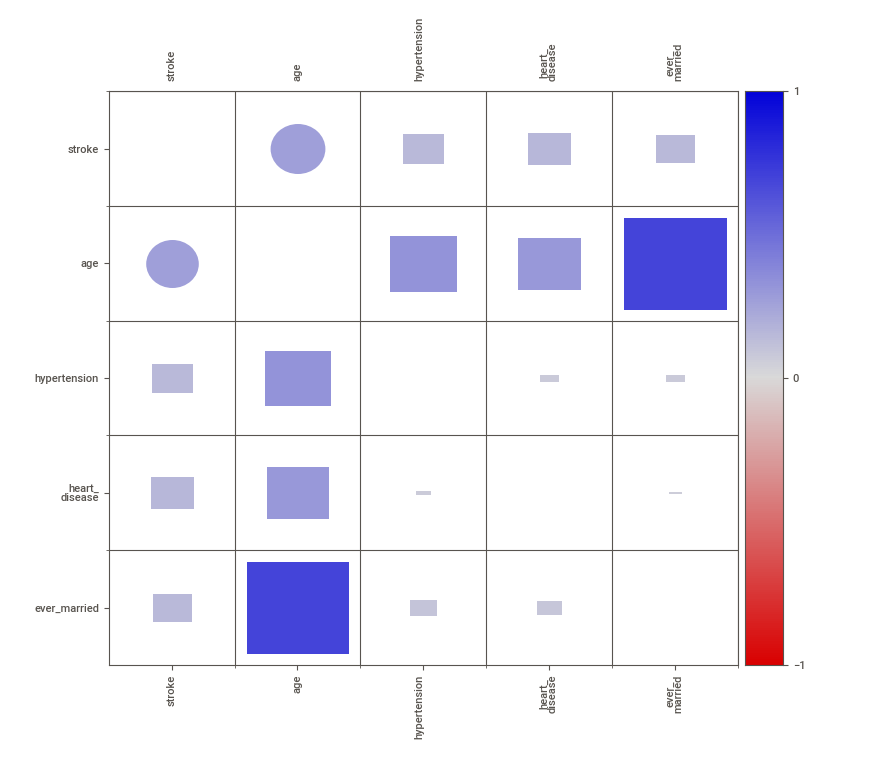
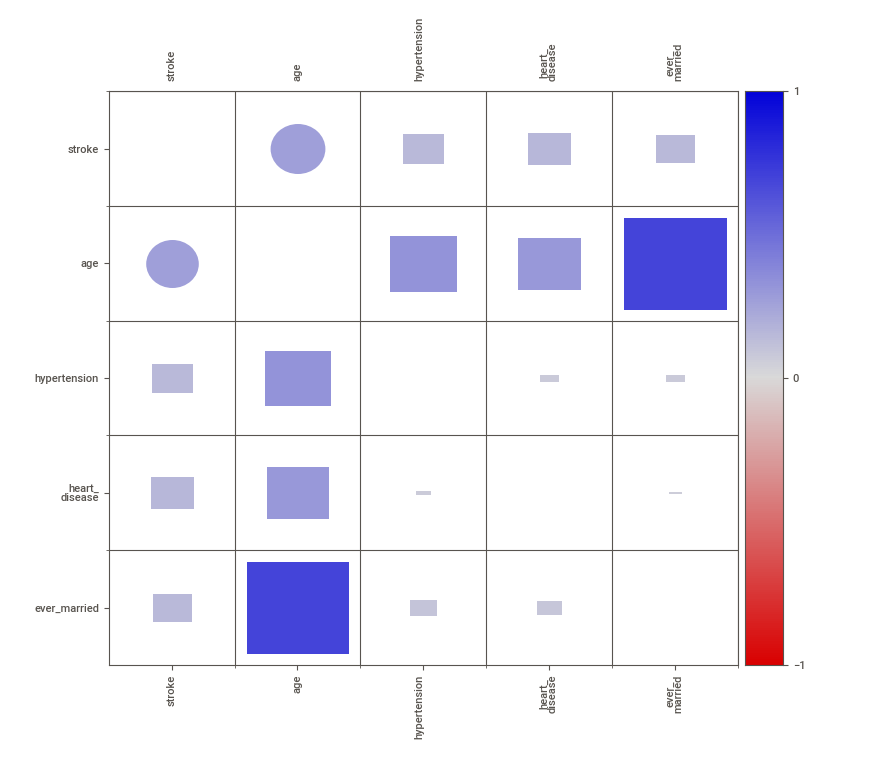

In [169]:
feature_config = sv.FeatureConfig(force_num = ["stroke"])

report = sv.compare([data1_train, "Train"], [data1_train, "Test"], 'stroke', feature_config)
report.show_notebook()

In [171]:
from sklearn.metrics import classification_report, confusion_matrix
import pickle

#K-Nearest Neighbors

In [172]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1454
           1       0.00      0.00      0.00        79

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533

[[1454    0]
 [  79    0]]


C:\Users\lenovo\.conda\envs\Data1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\.conda\envs\Data1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\.conda\envs\Data1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
# save the model to disk
filename = 'KNN.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9484670580560991


#Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1454
           1       0.00      0.00      0.00        79

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.94      0.92      1533

[[1448    6]
 [  79    0]]


In [177]:
# save the model to disk
filename = 'DT.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9445531637312459
